<a href="https://colab.research.google.com/github/swarthiksola/DAB/blob/main/assisgment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 10 records of dataset:
   Systolic_BP
0          151
1          114
2          171
3          160
4          120
5          174
6          174
7          123
8          102
9          121


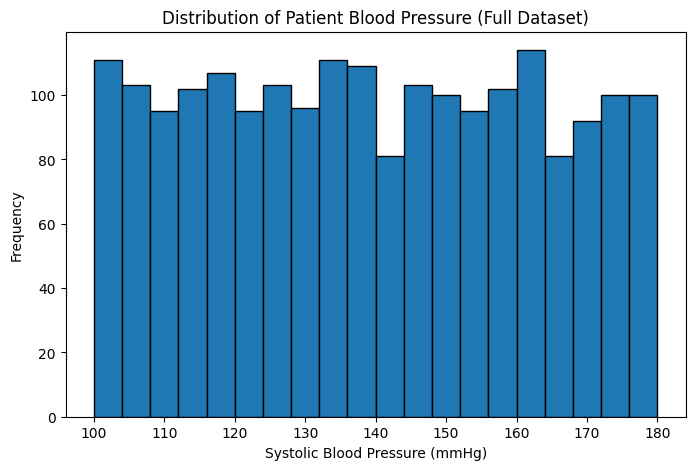

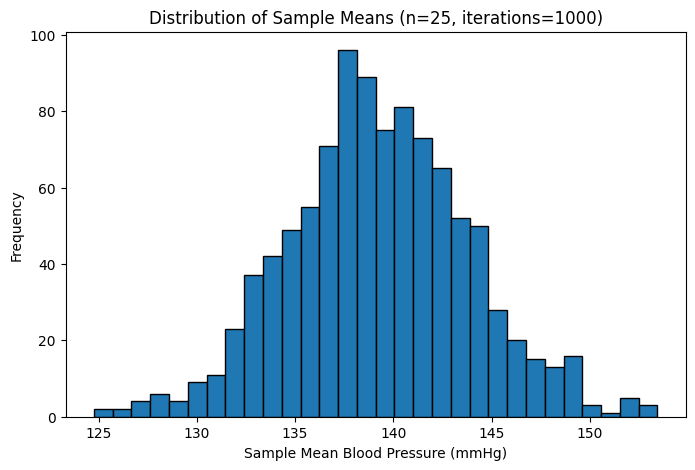

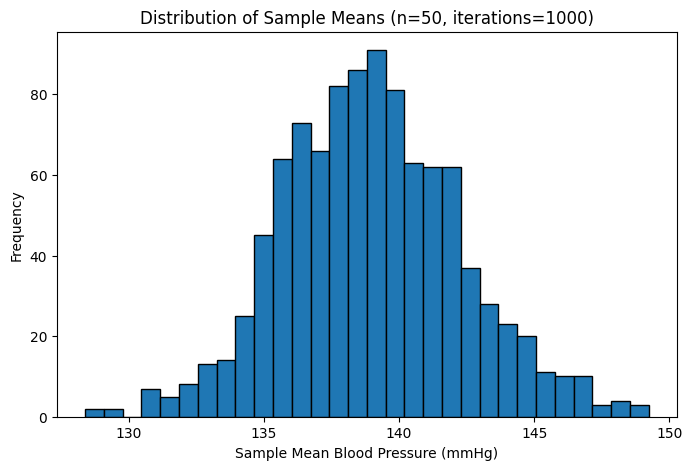

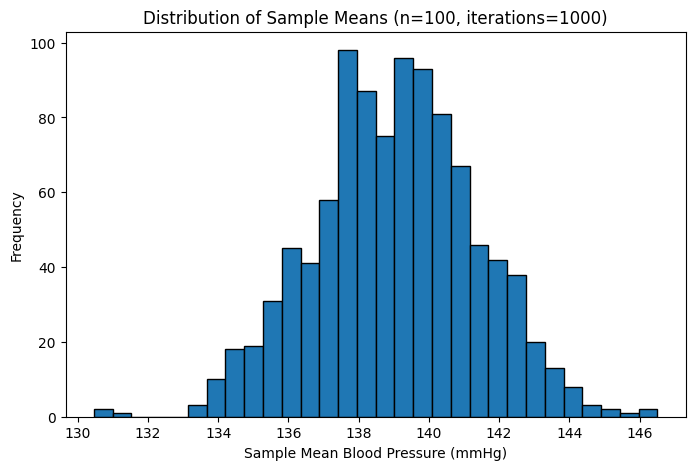


Population Statistics (Full Dataset):
Mean: 138.98
Median: 138.00
Variance: 539.15
Standard Deviation: 23.22

Sample Mean Variability (Standard Deviation of Sample Means):
n=25  -> 4.59
n=50  -> 3.31
n=100 -> 2.30

Observation:
As sample size increases, the distribution of sample means becomes narrower,
showing that larger samples give more accurate estimates of the true population mean.


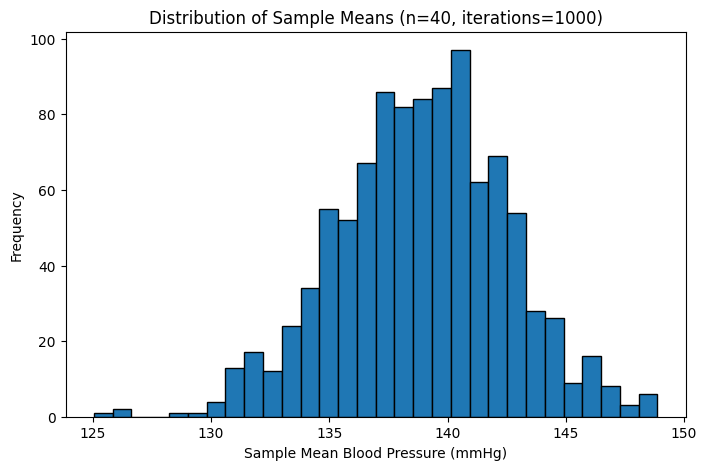

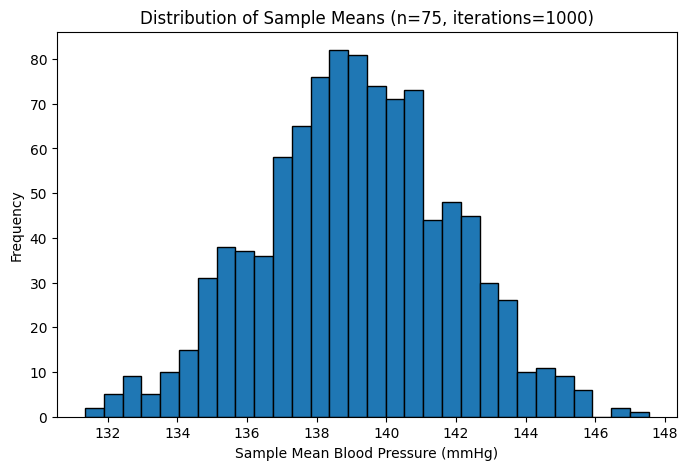

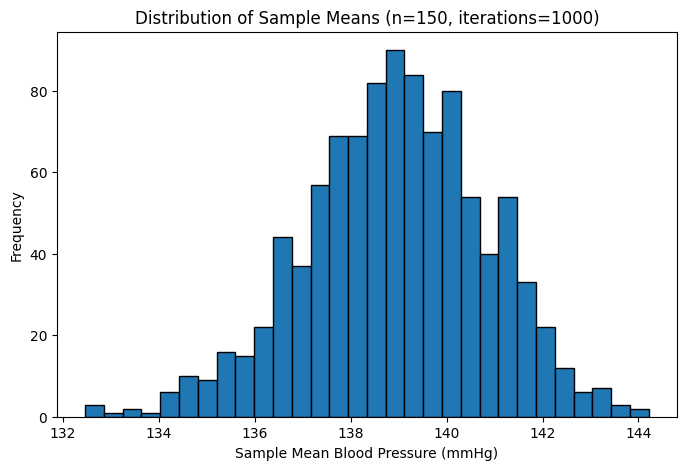

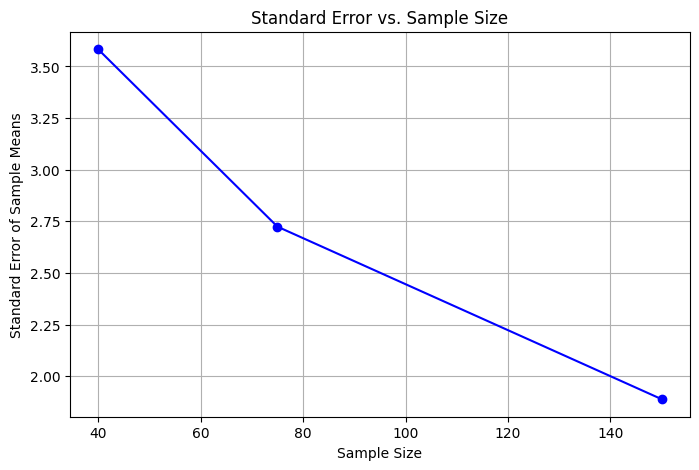


Standard Errors for Custom Sample Sizes:
Sample Size 40 -> Standard Error: 3.58
Sample Size 75 -> Standard Error: 2.72
Sample Size 150 -> Standard Error: 1.89


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)
blood_pressure = np.random.randint(100, 181, size=2000)


df = pd.DataFrame(blood_pressure, columns=["Systolic_BP"])

print("First 10 records of dataset:")
print(df.head(10))


plt.figure(figsize=(8,5))
plt.hist(df["Systolic_BP"], bins=20, edgecolor="black")
plt.title("Distribution of Patient Blood Pressure (Full Dataset)")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.show()


def sample_means_distribution(sample_size, iterations=1000):
    """
        Draw random samples, compute means, and plot distribution.
    """
    sample_means = []
    for _ in range(iterations):
        sample = np.random.choice(blood_pressure, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))

    plt.figure(figsize=(8,5))
    plt.hist(sample_means, bins=30, edgecolor="black")
    plt.title(f"Distribution of Sample Means (n={sample_size}, iterations={iterations})")
    plt.xlabel("Sample Mean Blood Pressure (mmHg)")
    plt.ylabel("Frequency")
    plt.show()

    return sample_means


means_25 = sample_means_distribution(25)
means_50 = sample_means_distribution(50)
means_100 = sample_means_distribution(100)


mean_bp = np.mean(blood_pressure)
median_bp = np.median(blood_pressure)
variance_bp = np.var(blood_pressure, ddof=1)
std_dev_bp = np.std(blood_pressure, ddof=1)

print("\nPopulation Statistics (Full Dataset):")
print(f"Mean: {mean_bp:.2f}")
print(f"Median: {median_bp:.2f}")
print(f"Variance: {variance_bp:.2f}")
print(f"Standard Deviation: {std_dev_bp:.2f}")


print("\nSample Mean Variability (Standard Deviation of Sample Means):")
print(f"n=25  -> {np.std(means_25):.2f}")
print(f"n=50  -> {np.std(means_50):.2f}")
print(f"n=100 -> {np.std(means_100):.2f}")

print("\nObservation:")
print("As sample size increases, the distribution of sample means becomes narrower,")
print("showing that larger samples give more accurate estimates of the true population mean.")

custom_sizes = [40, 75, 150]
errors = []

for size in custom_sizes:
    sample_means = sample_means_distribution(size)
    std_error = np.std(sample_means)
    errors.append(std_error)

plt.figure(figsize=(8,5))
plt.plot(custom_sizes, errors, marker="o", linestyle="-", color="blue")
plt.title("Standard Error vs. Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Standard Error of Sample Means")
plt.grid(True)
plt.show()

print("\nStandard Errors for Custom Sample Sizes:")
for size, err in zip(custom_sizes, errors):
    print(f"Sample Size {size} -> Standard Error: {err:.2f}")